In [1]:
import os
os.chdir( "../")

In [2]:
import pandas as pd
import numpy as np

from Recommenders.Recommender_import_list import *
from Evaluation.Evaluator import EvaluatorHoldout

path = "Dataset/data_train.csv"
df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])


df

2023-12-09 15:03:47.597192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-09 15:03:47.597221: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,UserID,ItemID,Interaction
0,1,15,1.0
1,1,16,1.0
2,1,133,1.0
3,1,161,1.0
4,1,187,1.0
...,...,...,...
478724,13024,13605,1.0
478725,13024,13823,1.0
478726,13024,15122,1.0
478727,13024,18185,1.0


In [3]:
df.Interaction.value_counts()

1.0    478729
Name: Interaction, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478729 entries, 0 to 478728
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UserID       478729 non-null  int64  
 1   ItemID       478729 non-null  int64  
 2   Interaction  478729 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 11.0 MB


In [5]:
user_ids = df["UserID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
item_ids = df["ItemID"].unique().tolist()
item2item_encoded = {x: i for i, x in enumerate(item_ids)}
item_encoded2item = {i: x for i, x in enumerate(item_ids)}
df["User"] = df["UserID"].map(user2user_encoded)
df["Item"] = df["ItemID"].map(item2item_encoded)

num_users = len(user2user_encoded)
num_items = len(item_encoded2item)
df["Interaction"] = df["Interaction"].values.astype(np.float32)

# min and max ratings will be used to normalize the ratings later
min_rating = 0.0
max_rating = max(df["Interaction"])

print(
    "Number of users: {}, Number of Items: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_items, min_rating, max_rating
    )
)

Number of users: 12638, Number of Items: 22222, Min rating: 0.0, Max rating: 1.0


In [6]:
df.head()

,UserID,ItemID,Interaction,User,Item
0,1,15,1.0,0,0
1,1,16,1.0,0,1
2,1,133,1.0,0,2
3,1,161,1.0,0,3
4,1,187,1.0,0,4


In [7]:
userId_unique = df["UserID"].unique()
itemId_unique = df["ItemID"].unique()

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample



urm_all = sps.coo_matrix((df["Interaction"].values, 
                          (df["User"].values, df["Item"].values)))

urm_train_validation, urm_test = split_train_in_two_percentage_global_sample(urm_all, train_percentage = 0.80)
urm_train, urm_validation = split_train_in_two_percentage_global_sample(urm_train_validation, train_percentage = 0.80)

In [9]:
num_users = len(userId_unique)
num_items = len(itemId_unique)

In [10]:

evaluator_validation = EvaluatorHoldout(urm_validation, cutoff_list=[10], ignore_users=[])

EvaluatorHoldout: Ignoring 2602 (20.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users


**CREATING HYBRID**


## Insert model here

In [11]:
SLIMEN_best_params = {'topK': 7693, 'l1_ratio': 0.08013148517795793, 'alpha': 0.0012244028139782985}
RP3Beta_best_params = {'topK': 41,
 'alpha': 0.24025759098180052,
 'beta': 0.21463311953617964,
 'normalize_similarity': True}
EASE_best_params = {'topK':None, 'normalize_matrix':False,'l2_norm':84.03422929536671}
ItemKNN_best_params = {'topK': 23, 'shrink': 18, 'similarity': 'tversky', 'normalize': False}
IALS_best_params = {'num_factors': 184, 'epochs': 110, 'confidence_scaling': 'linear', 'alpha': 13.161328184474756, 'epsilon': 0.2917133297273583, 'reg': 0.0005872701636540686}
SLIMBPR_best_params = {'topK': 5, 'epochs': 60, 'symmetric': False, 'sgd_mode': 'adagrad', 'lambda_i': 1e-05, 'lambda_j': 1e-05, 'learning_rate': 0.1}

In [12]:
#SLIMEN_recommender = SLIMElasticNetRecommender(urm_train)
#SLIMEN_recommender.fit(**SLIMEN_best_params)
#SLIMEN_recommender.save_model("Notebook/Experiments","SLIMEN_for_hybrid.zip")
#SLIMEN_recommender.load_model("Notebook/Experiments","SLIMEN_for_hybrid.zip")

In [13]:
#RP3Beta_recommender = RP3betaRecommender(urm_train)
#RP3Beta_recommender.fit(**RP3Beta_best_params)
#RP3Beta_recommender.save_model("Notebook/Experiments","RP3Beta_for_hybrid.zip")
#RP3Beta_recommender.load_model("Notebook/Experiments","RP3Beta_for_hybrid.zip")

In [14]:
#ITEMKNN_recommender = ItemKNNCFRecommender(urm_train)
#ITEMKNN_recommender.fit(**ItemKNN_best_params)
#ITEMKNN_recommender.save_model("Notebook/Experiments","ITEMKNN_for_hybrid.zip")
#ITEMKNN_recommender.load_model("Notebook/Experiments","ITEMKNN_for_hybrid.zip")

In [15]:
import gc
gc.collect()
#EASE_recommender = EASE_R_Recommender(urm_train)
#EASE_recommender.fit(**EASE_best_params)
gc.collect()
#EASE_recommender.save_model("Notebook/Experiments","EASE_for_hybrid.zip")
#EASE_recommender.load_model("Notebook/Experiments","EASE_for_hybrid.zip")

0

In [16]:
#IALS_recommender = IALSRecommender(urm_train)
#IALS_recommender.load_model("result_experiments/","IALSRecommender_best_model.zip")

In [17]:
#SLIMBPR_recommender = SLIM_BPR_Cython(urm_test)
#SLIMBPR_recommender.fit(**SLIMBPR_best_params)
#SLIMBPR_recommender.save_model("Notebook/Experiments","SLIMBPR_for_hybrid.zip")
#SLIMBPR_recommender.load_model("Notebook/Experiments","SLIMBPR_for_hybrid.zip")

In [18]:
SLIMEN_recommender = SLIMElasticNetRecommender(urm_train)
SLIMEN_recommender.fit(**SLIMEN_best_params)
gc.collect()
RP3Beta_recommender = RP3betaRecommender(urm_train)
RP3Beta_recommender.fit(**RP3Beta_best_params)
gc.collect()

ITEMKNN_recommender = ItemKNNCFRecommender(urm_train)
ITEMKNN_recommender.fit(**ItemKNN_best_params)
gc.collect()

IALS_recommender = IALSRecommender(urm_train)
IALS_recommender.fit(**IALS_best_params)

SLIMElasticNetRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 341 ( 1.5%) items with no interactions.
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 3.23 min. Items per second: 114.48
RP3betaRecommender: URM Detected 472 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 341 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 9025.36 column/sec. Elapsed time 2.46 sec
ItemKNNCFRecommender: URM Detected 472 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 341 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 14151.83 column/sec. Elapsed time 1.57 sec
IALSRecommender: URM Detected 472 ( 3.7%) users with no interactions.
IALSRecommender: URM Detected 341 ( 1.5%) items with no interactions.
IALSRecommender: Epoch 1 of 110. Elapsed time 16.43 sec
IALSRecommender: Epoch 2 of 110. Elapsed time 32.56 sec
IALSRecommender: Epoch 3 of 1

In [19]:
#SLIMEN_recommender.save_model("Notebook/Experiments","SLIMEN_for_hybrid.zip")
#RP3Beta_recommender.save_model("Notebook/Experiments","RP3Beta_for_hybrid.zip")
#ITEMKNN_recommender.save_model("Notebook/Experiments","ITEMKNN_for_hybrid.zip")
#IALS_recommender.save_model("Notebook/Experiments","IALS_for_hybrid.zip")


SLIMElasticNetRecommender: Saving model in file 'Notebook/ExperimentsSLIMEN_for_hybrid.zip'
SLIMElasticNetRecommender: Saving complete
RP3betaRecommender: Saving model in file 'Notebook/ExperimentsRP3Beta_for_hybrid.zip'
RP3betaRecommender: Saving complete
ItemKNNCFRecommender: Saving model in file 'Notebook/ExperimentsITEMKNN_for_hybrid.zip'
ItemKNNCFRecommender: Saving complete
IALSRecommender: Saving model in file 'Notebook/ExperimentsIALS_for_hybrid.zip'
IALSRecommender: Saving complete


In [20]:
model = GeneralizedLinearHybridRecommenderColdKNN

#def __init__(self, URM_train, KNN_recommender, recommenders: list, verbose=True, KNN_Under_Interactions=2):

In [21]:
import optuna as op

def objective(trial):
    #topK = trial.suggest_int("topK", 5, 1e4)
    #l1 = trial.suggest_float("l1_ratio", 0.01, 0.1)
    min_interaction = trial.suggest_int("min_interactions",1,10)
    alpha1 = trial.suggest_float("alpha1", 0.01, 2)
    alpha2 = trial.suggest_float("alpha2", 0.01, 2)
    alpha3 = trial.suggest_float("alpha3", 0.01, 2)

    alphas = [alpha1, alpha2, alpha3]

    recommender = model(urm_train, ITEMKNN_recommender, [SLIMEN_recommender, RP3Beta_recommender,IALS_recommender],True,min_interaction)
    recommender.fit(alphas = alphas)
    
    result, _ = evaluator_validation.evaluateRecommender(recommender)
    MAP_result = result["MAP"].item()
       
    return MAP_result

In [22]:
best_params = {'alpha': 0.4617199132501507}

study = op.create_study(direction="maximize")
#study.enqueue_trial(best_params)
study.optimize(objective, n_trials=100)

[I 2023-12-09 15:36:14,648] A new study created in memory with name: no-name-deda8763-97af-489c-a8d2-94a27893930e


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.51 sec. Users per second: 1822


[I 2023-12-09 15:36:20,167] Trial 0 finished with value: 0.027602559357740863 and parameters: {'min_interactions': 8, 'alpha1': 0.6259032824572549, 'alpha2': 1.7002282817727592, 'alpha3': 1.362477000493638}. Best is trial 0 with value: 0.027602559357740863.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.70 sec. Users per second: 1762


[I 2023-12-09 15:36:25,873] Trial 1 finished with value: 0.03031687512257488 and parameters: {'min_interactions': 5, 'alpha1': 1.638190182312588, 'alpha2': 1.3840931921128687, 'alpha3': 0.3743992687463364}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.93 sec. Users per second: 1693


[I 2023-12-09 15:36:31,813] Trial 2 finished with value: 0.02837390157338358 and parameters: {'min_interactions': 6, 'alpha1': 1.833755129899783, 'alpha2': 0.10794256967755697, 'alpha3': 0.9899313152402098}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.12 sec. Users per second: 1640


[I 2023-12-09 15:36:37,948] Trial 3 finished with value: 0.025479195531009084 and parameters: {'min_interactions': 8, 'alpha1': 0.7395271327383225, 'alpha2': 0.244983832744464, 'alpha3': 1.9001961649822587}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.08 sec. Users per second: 1650


[I 2023-12-09 15:36:44,040] Trial 4 finished with value: 0.027990140256979806 and parameters: {'min_interactions': 10, 'alpha1': 1.9858101078093504, 'alpha2': 1.397011069896056, 'alpha3': 1.8214866782579213}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.97 sec. Users per second: 1681


[I 2023-12-09 15:36:50,018] Trial 5 finished with value: 0.02832549251266886 and parameters: {'min_interactions': 5, 'alpha1': 0.15330959016400614, 'alpha2': 1.4446048043255144, 'alpha3': 0.6583316641236966}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.97 sec. Users per second: 1682


[I 2023-12-09 15:36:56,001] Trial 6 finished with value: 0.027503546755489935 and parameters: {'min_interactions': 3, 'alpha1': 0.8283224794439613, 'alpha2': 1.1902250625674495, 'alpha3': 1.334244613888598}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1687


[I 2023-12-09 15:37:01,959] Trial 7 finished with value: 0.02972977044544425 and parameters: {'min_interactions': 8, 'alpha1': 0.1900747645537272, 'alpha2': 0.19350417332290648, 'alpha3': 0.06491708168986965}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.87 sec. Users per second: 1710


[I 2023-12-09 15:37:07,839] Trial 8 finished with value: 0.0286875067218333 and parameters: {'min_interactions': 1, 'alpha1': 1.8916193359247304, 'alpha2': 0.38729663283392685, 'alpha3': 1.1127175808221996}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.10 sec. Users per second: 1645


[I 2023-12-09 15:37:13,951] Trial 9 finished with value: 0.029755918376384888 and parameters: {'min_interactions': 5, 'alpha1': 1.2512800061958163, 'alpha2': 1.8025079170841596, 'alpha3': 0.7419120603274751}. Best is trial 1 with value: 0.03031687512257488.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.84 sec. Users per second: 1719


[I 2023-12-09 15:37:19,813] Trial 10 finished with value: 0.030827117614682552 and parameters: {'min_interactions': 3, 'alpha1': 1.4261217882529948, 'alpha2': 0.8272730457710842, 'alpha3': 0.022759739006430135}. Best is trial 10 with value: 0.030827117614682552.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.82 sec. Users per second: 1725


[I 2023-12-09 15:37:25,655] Trial 11 finished with value: 0.030811333168846326 and parameters: {'min_interactions': 3, 'alpha1': 1.4428827392567483, 'alpha2': 0.8031492669551558, 'alpha3': 0.028935338413660274}. Best is trial 10 with value: 0.030827117614682552.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.88 sec. Users per second: 1707


[I 2023-12-09 15:37:31,559] Trial 12 finished with value: 0.031033525340520417 and parameters: {'min_interactions': 2, 'alpha1': 1.4013709417004723, 'alpha2': 0.7551983197473086, 'alpha3': 0.07897341955199189}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1663


[I 2023-12-09 15:37:37,619] Trial 13 finished with value: 0.03082826823435658 and parameters: {'min_interactions': 1, 'alpha1': 1.2149357814945876, 'alpha2': 0.8005997493628534, 'alpha3': 0.263411483511853}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.07 sec. Users per second: 1655


[I 2023-12-09 15:37:43,706] Trial 14 finished with value: 0.03062053195796738 and parameters: {'min_interactions': 1, 'alpha1': 1.1345160862464647, 'alpha2': 0.6416896724047102, 'alpha3': 0.30984295590844846}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.99 sec. Users per second: 1677


[I 2023-12-09 15:37:49,716] Trial 15 finished with value: 0.030639183067939814 and parameters: {'min_interactions': 2, 'alpha1': 1.0275379252181291, 'alpha2': 1.0250011330954238, 'alpha3': 0.2928536287814728}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.89 sec. Users per second: 1704


[I 2023-12-09 15:37:55,630] Trial 16 finished with value: 0.02998707035624155 and parameters: {'min_interactions': 1, 'alpha1': 1.3613539549088236, 'alpha2': 0.5627112812322093, 'alpha3': 0.5514638561388426}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.21 sec. Users per second: 1616


[I 2023-12-09 15:38:01,867] Trial 17 finished with value: 0.030621540232939483 and parameters: {'min_interactions': 2, 'alpha1': 1.597604445875045, 'alpha2': 0.5358918517415114, 'alpha3': 0.2538946558904258}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.89 sec. Users per second: 1705


[I 2023-12-09 15:38:07,780] Trial 18 finished with value: 0.029744119582202657 and parameters: {'min_interactions': 4, 'alpha1': 1.1230710316523622, 'alpha2': 0.8961727978931193, 'alpha3': 0.5404882277332583}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.17 sec. Users per second: 1625


[I 2023-12-09 15:38:14,020] Trial 19 finished with value: 0.030869314910765996 and parameters: {'min_interactions': 2, 'alpha1': 0.9197789905444257, 'alpha2': 1.0531477077299192, 'alpha3': 0.19551037799656507}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.76 sec. Users per second: 1741


[I 2023-12-09 15:38:19,811] Trial 20 finished with value: 0.029607282829433302 and parameters: {'min_interactions': 6, 'alpha1': 0.9252669073190241, 'alpha2': 1.1124708737137452, 'alpha3': 0.5090036610767612}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.96 sec. Users per second: 1684


[I 2023-12-09 15:38:25,792] Trial 21 finished with value: 0.030727848001164338 and parameters: {'min_interactions': 2, 'alpha1': 1.2412745903646538, 'alpha2': 0.7279157631988646, 'alpha3': 0.1943851783921837}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.93 sec. Users per second: 1694


[I 2023-12-09 15:38:31,745] Trial 22 finished with value: 0.030939791354299438 and parameters: {'min_interactions': 2, 'alpha1': 0.966081641488829, 'alpha2': 0.9424152757719094, 'alpha3': 0.15555165581081293}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1688


[I 2023-12-09 15:38:37,719] Trial 23 finished with value: 0.030660807600574685 and parameters: {'min_interactions': 4, 'alpha1': 0.9463406675409934, 'alpha2': 0.9187931766580814, 'alpha3': 0.013492924363923714}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.89 sec. Users per second: 1703


[I 2023-12-09 15:38:43,636] Trial 24 finished with value: 0.030836714020004465 and parameters: {'min_interactions': 2, 'alpha1': 0.6157803372715984, 'alpha2': 1.072972978038403, 'alpha3': 0.16037528061405726}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.23 sec. Users per second: 1612


[I 2023-12-09 15:38:49,885] Trial 25 finished with value: 0.029709905451485986 and parameters: {'min_interactions': 4, 'alpha1': 1.0404200342027798, 'alpha2': 0.4258555599039407, 'alpha3': 0.3971279661732363}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1699


[I 2023-12-09 15:38:55,818] Trial 26 finished with value: 0.030702514598240357 and parameters: {'min_interactions': 3, 'alpha1': 0.8155771854129403, 'alpha2': 0.6730480620801498, 'alpha3': 0.15093910209351155}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.05 sec. Users per second: 1659


[I 2023-12-09 15:39:01,892] Trial 27 finished with value: 0.029733012741432658 and parameters: {'min_interactions': 2, 'alpha1': 0.49174054682727064, 'alpha2': 0.9811789988287991, 'alpha3': 0.41668565796062}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.84 sec. Users per second: 1718


[I 2023-12-09 15:39:07,759] Trial 28 finished with value: 0.03070227735707044 and parameters: {'min_interactions': 4, 'alpha1': 0.9845266626998513, 'alpha2': 1.2489899091938037, 'alpha3': 0.1655167487551294}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.01 sec. Users per second: 1670


[I 2023-12-09 15:39:13,792] Trial 29 finished with value: 0.027842856984696535 and parameters: {'min_interactions': 7, 'alpha1': 0.4398206364414755, 'alpha2': 0.9476105883715676, 'alpha3': 0.7770056988363578}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1664


[I 2023-12-09 15:39:19,845] Trial 30 finished with value: 0.030364390574883056 and parameters: {'min_interactions': 3, 'alpha1': 0.7203503821072845, 'alpha2': 1.66017893215971, 'alpha3': 0.3966002835955264}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.86 sec. Users per second: 1713


[I 2023-12-09 15:39:25,738] Trial 31 finished with value: 0.030817339324463993 and parameters: {'min_interactions': 2, 'alpha1': 0.6119564751823359, 'alpha2': 1.0326447547007283, 'alpha3': 0.16055393423455372}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.10 sec. Users per second: 1645


[I 2023-12-09 15:39:31,864] Trial 32 finished with value: 0.03087040226612792 and parameters: {'min_interactions': 2, 'alpha1': 0.8818322711911825, 'alpha2': 1.1482361730492734, 'alpha3': 0.17544999302468292}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.14 sec. Users per second: 1635


[I 2023-12-09 15:39:38,024] Trial 33 finished with value: 0.030953183618339337 and parameters: {'min_interactions': 1, 'alpha1': 0.9096015896402405, 'alpha2': 1.2688586474376375, 'alpha3': 0.2932836178900352}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.01 sec. Users per second: 1670


[I 2023-12-09 15:39:44,065] Trial 34 finished with value: 0.03088785135417288 and parameters: {'min_interactions': 1, 'alpha1': 1.073729122005253, 'alpha2': 1.2892524064841173, 'alpha3': 0.3420349862035081}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.04 sec. Users per second: 1661


[I 2023-12-09 15:39:50,136] Trial 35 finished with value: 0.03094644992313414 and parameters: {'min_interactions': 1, 'alpha1': 1.6303542720076842, 'alpha2': 1.2975062169043523, 'alpha3': 0.3280283370501761}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.77 sec. Users per second: 1740


[I 2023-12-09 15:39:55,935] Trial 36 finished with value: 0.02959100808517936 and parameters: {'min_interactions': 10, 'alpha1': 1.660392324254112, 'alpha2': 1.5034338958170161, 'alpha3': 0.468084158781517}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1688


[I 2023-12-09 15:40:01,911] Trial 37 finished with value: 0.03072934262053458 and parameters: {'min_interactions': 1, 'alpha1': 1.586602296245637, 'alpha2': 1.9958375375153494, 'alpha3': 0.6190461954365591}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.81 sec. Users per second: 1727


[I 2023-12-09 15:40:07,745] Trial 38 finished with value: 0.029745147627272234 and parameters: {'min_interactions': 9, 'alpha1': 1.7039394440647495, 'alpha2': 1.3456096773910293, 'alpha3': 0.3532585911199766}. Best is trial 12 with value: 0.031033525340520417.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.83 sec. Users per second: 1722


[I 2023-12-09 15:40:13,600] Trial 39 finished with value: 0.031210432126883153 and parameters: {'min_interactions': 1, 'alpha1': 1.830475514866302, 'alpha2': 1.2243172247894216, 'alpha3': 0.09830891652040918}. Best is trial 39 with value: 0.031210432126883153.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.05 sec. Users per second: 1658


[I 2023-12-09 15:40:19,684] Trial 40 finished with value: 0.030736151442110213 and parameters: {'min_interactions': 1, 'alpha1': 1.8028120753429082, 'alpha2': 1.221724460421468, 'alpha3': 0.46401949844527307}. Best is trial 39 with value: 0.031210432126883153.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.14 sec. Users per second: 1636


[I 2023-12-09 15:40:25,845] Trial 41 finished with value: 0.031195039128977215 and parameters: {'min_interactions': 1, 'alpha1': 1.96742370359008, 'alpha2': 1.1582832018301017, 'alpha3': 0.09874644421062687}. Best is trial 39 with value: 0.031210432126883153.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.84 sec. Users per second: 1720


[I 2023-12-09 15:40:31,717] Trial 42 finished with value: 0.031255199535640196 and parameters: {'min_interactions': 1, 'alpha1': 1.964974855519122, 'alpha2': 1.3217356216687588, 'alpha3': 0.08341620729084301}. Best is trial 42 with value: 0.031255199535640196.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.93 sec. Users per second: 1693


[I 2023-12-09 15:40:37,672] Trial 43 finished with value: 0.031225955607432566 and parameters: {'min_interactions': 1, 'alpha1': 1.9475741331977907, 'alpha2': 1.2081149662963928, 'alpha3': 0.07569273704276054}. Best is trial 42 with value: 0.031255199535640196.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.72 sec. Users per second: 1755


[I 2023-12-09 15:40:43,416] Trial 44 finished with value: 0.03125516790348422 and parameters: {'min_interactions': 1, 'alpha1': 1.9956593868214085, 'alpha2': 1.449331133233648, 'alpha3': 0.07764088226903842}. Best is trial 42 with value: 0.031255199535640196.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.08 sec. Users per second: 1650


[I 2023-12-09 15:40:49,528] Trial 45 finished with value: 0.03125856440623306 and parameters: {'min_interactions': 1, 'alpha1': 1.965434754505569, 'alpha2': 1.3923909519042155, 'alpha3': 0.08955004699587454}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.90 sec. Users per second: 1700


[I 2023-12-09 15:40:55,469] Trial 46 finished with value: 0.030895775209246967 and parameters: {'min_interactions': 3, 'alpha1': 1.9836134048770488, 'alpha2': 1.4519947181416974, 'alpha3': 0.0350080544301925}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.77 sec. Users per second: 1741


[I 2023-12-09 15:41:01,262] Trial 47 finished with value: 0.03119138956898048 and parameters: {'min_interactions': 1, 'alpha1': 1.8659922079097766, 'alpha2': 1.3656996819957654, 'alpha3': 0.10254978662311075}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.92 sec. Users per second: 1694


[I 2023-12-09 15:41:07,212] Trial 48 finished with value: 0.030242966590117194 and parameters: {'min_interactions': 7, 'alpha1': 1.8078620389978601, 'alpha2': 1.5449468293296904, 'alpha3': 0.25245110619664857}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.88 sec. Users per second: 1707


[I 2023-12-09 15:41:13,124] Trial 49 finished with value: 0.03090361207589212 and parameters: {'min_interactions': 3, 'alpha1': 1.897873957681207, 'alpha2': 1.4215425971223437, 'alpha3': 0.030996072971677134}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.04 sec. Users per second: 1662


[I 2023-12-09 15:41:19,191] Trial 50 finished with value: 0.031028369299095016 and parameters: {'min_interactions': 1, 'alpha1': 1.77505399242964, 'alpha2': 1.2134617136988808, 'alpha3': 0.24096863756680448}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.93 sec. Users per second: 1693


[I 2023-12-09 15:41:25,155] Trial 51 finished with value: 0.03125246730816704 and parameters: {'min_interactions': 1, 'alpha1': 1.9212809526969388, 'alpha2': 1.341672484896361, 'alpha3': 0.07469218912293328}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.86 sec. Users per second: 1712


[I 2023-12-09 15:41:31,041] Trial 52 finished with value: 0.03125114271163519 and parameters: {'min_interactions': 1, 'alpha1': 1.9943265906357361, 'alpha2': 1.3556503040590742, 'alpha3': 0.09040278023493346}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.85 sec. Users per second: 1715


[I 2023-12-09 15:41:36,924] Trial 53 finished with value: 0.03089658578324404 and parameters: {'min_interactions': 2, 'alpha1': 1.994137049443324, 'alpha2': 1.3819870789014188, 'alpha3': 0.01084660310658761}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1666


[I 2023-12-09 15:41:42,973] Trial 54 finished with value: 0.031151651673025013 and parameters: {'min_interactions': 1, 'alpha1': 1.917837626138546, 'alpha2': 1.5733810962384787, 'alpha3': 0.2555754231395837}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.85 sec. Users per second: 1714


[I 2023-12-09 15:41:48,852] Trial 55 finished with value: 0.03115610785299927 and parameters: {'min_interactions': 1, 'alpha1': 1.917969438209021, 'alpha2': 1.3327199316268257, 'alpha3': 0.11925611828074303}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.06 sec. Users per second: 1657


[I 2023-12-09 15:41:54,939] Trial 56 finished with value: 0.031079150771508576 and parameters: {'min_interactions': 2, 'alpha1': 1.9993387494659038, 'alpha2': 1.4604086242351288, 'alpha3': 0.06490056165038105}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1686


[I 2023-12-09 15:42:00,922] Trial 57 finished with value: 0.03093013168466568 and parameters: {'min_interactions': 2, 'alpha1': 1.7471509832874736, 'alpha2': 1.3837076983140617, 'alpha3': 0.23580033574325115}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1665


[I 2023-12-09 15:42:06,998] Trial 58 finished with value: 0.031200835721561345 and parameters: {'min_interactions': 1, 'alpha1': 1.871304518778266, 'alpha2': 1.1030415270997056, 'alpha3': 0.08801454072985636}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.94 sec. Users per second: 1689


[I 2023-12-09 15:42:12,965] Trial 59 finished with value: 0.030896510656873682 and parameters: {'min_interactions': 3, 'alpha1': 1.7268596053126946, 'alpha2': 1.4915682369861214, 'alpha3': 0.21015732302590795}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.06 sec. Users per second: 1656


[I 2023-12-09 15:42:19,051] Trial 60 finished with value: 0.0308836956796804 and parameters: {'min_interactions': 1, 'alpha1': 1.840266718868663, 'alpha2': 1.1604489628456802, 'alpha3': 0.3339384823267727}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.05 sec. Users per second: 1659


[I 2023-12-09 15:42:25,120] Trial 61 finished with value: 0.031224808941778117 and parameters: {'min_interactions': 1, 'alpha1': 1.931776921904701, 'alpha2': 1.3145324959398312, 'alpha3': 0.09992183548716746}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.97 sec. Users per second: 1681


[I 2023-12-09 15:42:31,113] Trial 62 finished with value: 0.031008124719264837 and parameters: {'min_interactions': 2, 'alpha1': 1.92327096676365, 'alpha2': 1.307000728738745, 'alpha3': 0.1051986882910539}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.96 sec. Users per second: 1685


[I 2023-12-09 15:42:37,094] Trial 63 finished with value: 0.03114959953690549 and parameters: {'min_interactions': 1, 'alpha1': 1.9367870507147444, 'alpha2': 1.4354572116027147, 'alpha3': 0.023835821621022282}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.04 sec. Users per second: 1661


[I 2023-12-09 15:42:43,161] Trial 64 finished with value: 0.030991023584935724 and parameters: {'min_interactions': 2, 'alpha1': 1.8462394115910523, 'alpha2': 1.5661612467376005, 'alpha3': 0.1826705688419097}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.18 sec. Users per second: 1625


[I 2023-12-09 15:42:49,376] Trial 65 finished with value: 0.031107062195145325 and parameters: {'min_interactions': 1, 'alpha1': 1.9937774587822945, 'alpha2': 1.341522236811102, 'alpha3': 0.12785155735021353}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.10 sec. Users per second: 1644


[I 2023-12-09 15:42:55,514] Trial 66 finished with value: 0.03086111032030753 and parameters: {'min_interactions': 2, 'alpha1': 1.769004677938575, 'alpha2': 1.2629340354369063, 'alpha3': 0.22787175325666356}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.12 sec. Users per second: 1639


[I 2023-12-09 15:43:01,663] Trial 67 finished with value: 0.03038462329265468 and parameters: {'min_interactions': 5, 'alpha1': 1.8921059937601594, 'alpha2': 1.4046185352789795, 'alpha3': 0.2795562484732237}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.84 sec. Users per second: 1720


[I 2023-12-09 15:43:07,528] Trial 68 finished with value: 0.031215327203021778 and parameters: {'min_interactions': 1, 'alpha1': 1.9367928766849456, 'alpha2': 1.1923135132487057, 'alpha3': 0.07263883601379653}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1665


[I 2023-12-09 15:43:13,581] Trial 69 finished with value: 0.030931907039420267 and parameters: {'min_interactions': 2, 'alpha1': 1.8257904303190289, 'alpha2': 1.0897489944508705, 'alpha3': 0.15170569304416343}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.82 sec. Users per second: 1725


[I 2023-12-09 15:43:19,426] Trial 70 finished with value: 0.03122091818659201 and parameters: {'min_interactions': 1, 'alpha1': 1.6898310496926316, 'alpha2': 1.6250020124591278, 'alpha3': 0.19734170252522432}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.09 sec. Users per second: 1647


[I 2023-12-09 15:43:25,545] Trial 71 finished with value: 0.03114714013677766 and parameters: {'min_interactions': 1, 'alpha1': 1.8865758999129671, 'alpha2': 1.6157625590152547, 'alpha3': 0.01018095081510155}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.83 sec. Users per second: 1720


[I 2023-12-09 15:43:31,403] Trial 72 finished with value: 0.03119256391277143 and parameters: {'min_interactions': 1, 'alpha1': 1.9521027605643388, 'alpha2': 1.5143264245128916, 'alpha3': 0.20011072795783874}. Best is trial 45 with value: 0.03125856440623306.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.85 sec. Users per second: 1714


[I 2023-12-09 15:43:37,286] Trial 73 finished with value: 0.031274601909317155 and parameters: {'min_interactions': 1, 'alpha1': 1.6894393168885435, 'alpha2': 1.693863970933428, 'alpha3': 0.06928270058933839}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.76 sec. Users per second: 1743


[I 2023-12-09 15:43:43,084] Trial 74 finished with value: 0.03104715879974969 and parameters: {'min_interactions': 2, 'alpha1': 1.768948457315357, 'alpha2': 1.7363107977077328, 'alpha3': 0.08889791588433793}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1686


[I 2023-12-09 15:43:49,064] Trial 75 finished with value: 0.03101859496289579 and parameters: {'min_interactions': 1, 'alpha1': 1.8717009937995184, 'alpha2': 1.456506322162062, 'alpha3': 0.29657415301008083}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1698


[I 2023-12-09 15:43:55,000] Trial 76 finished with value: 0.030930234489172558 and parameters: {'min_interactions': 2, 'alpha1': 1.940229501264776, 'alpha2': 1.2843397945237036, 'alpha3': 0.12047272310530568}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1698


[I 2023-12-09 15:44:00,945] Trial 77 finished with value: 0.03126031208285124 and parameters: {'min_interactions': 1, 'alpha1': 1.80582208065393, 'alpha2': 1.3302169296087831, 'alpha3': 0.054759663503770845}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.82 sec. Users per second: 1723


[I 2023-12-09 15:44:06,804] Trial 78 finished with value: 0.0306717048783114 and parameters: {'min_interactions': 2, 'alpha1': 1.5430266937047974, 'alpha2': 1.3689658178453747, 'alpha3': 0.3761454586197285}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1664


[I 2023-12-09 15:44:12,860] Trial 79 finished with value: 0.031264159343822796 and parameters: {'min_interactions': 1, 'alpha1': 1.70814580722783, 'alpha2': 1.5068556912135433, 'alpha3': 0.05463979972576905}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.71 sec. Users per second: 1756


[I 2023-12-09 15:44:18,600] Trial 80 finished with value: 0.03126247888553611 and parameters: {'min_interactions': 1, 'alpha1': 1.6931758505578969, 'alpha2': 1.492086963141948, 'alpha3': 0.05176374806515125}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.98 sec. Users per second: 1678


[I 2023-12-09 15:44:24,612] Trial 81 finished with value: 0.031235579690890768 and parameters: {'min_interactions': 1, 'alpha1': 1.706507948527646, 'alpha2': 1.5095990301734405, 'alpha3': 0.1618884803058333}. Best is trial 73 with value: 0.031274601909317155.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1699


[I 2023-12-09 15:44:30,546] Trial 82 finished with value: 0.03128608438193957 and parameters: {'min_interactions': 1, 'alpha1': 1.789061366652051, 'alpha2': 1.7116843970342885, 'alpha3': 0.04387519223823205}. Best is trial 82 with value: 0.03128608438193957.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.02 sec. Users per second: 1667


[I 2023-12-09 15:44:36,603] Trial 83 finished with value: 0.03126937864956024 and parameters: {'min_interactions': 1, 'alpha1': 1.6562998041560473, 'alpha2': 1.715752119308784, 'alpha3': 0.057848317207732494}. Best is trial 82 with value: 0.03128608438193957.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.01 sec. Users per second: 1670


[I 2023-12-09 15:44:42,654] Trial 84 finished with value: 0.03108063352882033 and parameters: {'min_interactions': 2, 'alpha1': 1.6565556316823316, 'alpha2': 1.7127665885426024, 'alpha3': 0.04198545496747699}. Best is trial 82 with value: 0.03128608438193957.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.96 sec. Users per second: 1684


[I 2023-12-09 15:44:48,663] Trial 85 finished with value: 0.03128263252291775 and parameters: {'min_interactions': 1, 'alpha1': 1.5632649108014527, 'alpha2': 1.6703907651544962, 'alpha3': 0.15612733310241125}. Best is trial 82 with value: 0.03128608438193957.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.04 sec. Users per second: 1662


[I 2023-12-09 15:44:54,727] Trial 86 finished with value: 0.031328230275769385 and parameters: {'min_interactions': 1, 'alpha1': 1.5260078394851804, 'alpha2': 1.7692589138103383, 'alpha3': 0.1466125937562271}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.01 sec. Users per second: 1671


[I 2023-12-09 15:45:00,765] Trial 87 finished with value: 0.03128314259143301 and parameters: {'min_interactions': 1, 'alpha1': 1.563557118444094, 'alpha2': 1.743936377006137, 'alpha3': 0.15408088424714822}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.05 sec. Users per second: 1658


[I 2023-12-09 15:45:06,849] Trial 88 finished with value: 0.030386754509164105 and parameters: {'min_interactions': 7, 'alpha1': 1.5240627617473639, 'alpha2': 1.782959129381815, 'alpha3': 0.15758225951543717}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1697


[I 2023-12-09 15:45:12,789] Trial 89 finished with value: 0.03021516192500677 and parameters: {'min_interactions': 6, 'alpha1': 1.6004110086414824, 'alpha2': 1.681532609283436, 'alpha3': 0.3063436876480218}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.03 sec. Users per second: 1664


[I 2023-12-09 15:45:18,844] Trial 90 finished with value: 0.031003348263711258 and parameters: {'min_interactions': 2, 'alpha1': 1.5291924717099592, 'alpha2': 1.8435374746061308, 'alpha3': 0.20799049102366934}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.95 sec. Users per second: 1686


[I 2023-12-09 15:45:24,821] Trial 91 finished with value: 0.03127870222753665 and parameters: {'min_interactions': 1, 'alpha1': 1.6591734924567392, 'alpha2': 1.6365360074197908, 'alpha3': 0.14516114575474753}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.24 sec. Users per second: 1608


[I 2023-12-09 15:45:31,099] Trial 92 finished with value: 0.031164344075613724 and parameters: {'min_interactions': 1, 'alpha1': 1.6651307886396156, 'alpha2': 1.6590250357489607, 'alpha3': 0.011125062384574447}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.97 sec. Users per second: 1681


[I 2023-12-09 15:45:37,091] Trial 93 finished with value: 0.031305633054337964 and parameters: {'min_interactions': 1, 'alpha1': 1.627119910161425, 'alpha2': 1.746125089496874, 'alpha3': 0.12889214987501718}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.15 sec. Users per second: 1633


[I 2023-12-09 15:45:43,264] Trial 94 finished with value: 0.03132265906229662 and parameters: {'min_interactions': 1, 'alpha1': 1.4704774284725617, 'alpha2': 1.7645241729340304, 'alpha3': 0.13766441475665298}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.99 sec. Users per second: 1677


[I 2023-12-09 15:45:49,280] Trial 95 finished with value: 0.031288219552468535 and parameters: {'min_interactions': 1, 'alpha1': 1.42234855435759, 'alpha2': 1.753729958180914, 'alpha3': 0.13649471436828273}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.99 sec. Users per second: 1676


[I 2023-12-09 15:45:55,299] Trial 96 finished with value: 0.03092833655981356 and parameters: {'min_interactions': 2, 'alpha1': 1.4749179214803192, 'alpha2': 1.856383046987235, 'alpha3': 0.2667171684315132}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.28 sec. Users per second: 1597


[I 2023-12-09 15:46:01,611] Trial 97 finished with value: 0.03130667296146603 and parameters: {'min_interactions': 1, 'alpha1': 1.3880325830575635, 'alpha2': 1.7825470901272313, 'alpha3': 0.13201929489845388}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 5.91 sec. Users per second: 1698


[I 2023-12-09 15:46:07,547] Trial 98 finished with value: 0.030154313518951082 and parameters: {'min_interactions': 8, 'alpha1': 1.381253892778787, 'alpha2': 1.7614583067219551, 'alpha3': 0.14194776613602145}. Best is trial 86 with value: 0.031328230275769385.


SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10036 (100.0%) in 6.10 sec. Users per second: 1644


[I 2023-12-09 15:46:13,682] Trial 99 finished with value: 0.03120153953703206 and parameters: {'min_interactions': 1, 'alpha1': 1.468877730551544, 'alpha2': 1.829746077741834, 'alpha3': 0.22412080673755558}. Best is trial 86 with value: 0.031328230275769385.


In [23]:
study.trials_dataframe().to_csv("HYBRID_KNN_optuna_V1.csv")

In [24]:
study.best_trial

FrozenTrial(number=86, state=TrialState.COMPLETE, values=[0.031328230275769385], datetime_start=datetime.datetime(2023, 12, 9, 15, 44, 48, 664289), datetime_complete=datetime.datetime(2023, 12, 9, 15, 44, 54, 727277), params={'min_interactions': 1, 'alpha1': 1.5260078394851804, 'alpha2': 1.7692589138103383, 'alpha3': 0.1466125937562271}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'min_interactions': IntDistribution(high=10, log=False, low=1, step=1), 'alpha1': FloatDistribution(high=2.0, log=False, low=0.01, step=None), 'alpha2': FloatDistribution(high=2.0, log=False, low=0.01, step=None), 'alpha3': FloatDistribution(high=2.0, log=False, low=0.01, step=None)}, trial_id=86, value=None)

In [25]:
study.best_value

0.031328230275769385

In [26]:
study.best_params

{'min_interactions': 1,
 'alpha1': 1.5260078394851804,
 'alpha2': 1.7692589138103383,
 'alpha3': 0.1466125937562271}

1

In [34]:
recommender = model(urm_train, ITEMKNN_recommender, [SLIMEN_recommender, RP3Beta_recommender,IALS_recommender],True,study.best_params.get("min_interactions"))
recommender.fit(alphas = [study.best_params.get("alpha1"),study.best_params.get("alpha2"),study.best_params.get("alpha3")])

SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 472 ( 3.7%) users with no interactions.
SLIMElasticNetRP3betaIALSHybridRecommender: URM Detected 341 ( 1.5%) items with no interactions.


In [ ]:
noknn_recommender = model(urm_train, ITEMKNN_recommender, [SLIMEN_recommender, RP3Beta_recommender,IALS_recommender],True, 0)
noknn_recommender.fit(alphas = [study.best_params.get("alpha1"),study.best_params.get("alpha2"),study.best_params.get("alpha3")])

In [35]:
from Evaluation.Evaluator import EvaluatorHoldout
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10], ignore_users=[])
evaluator_test.evaluateRecommender(recommender)

EvaluatorHoldout: Ignoring 2128 (16.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10510 (100.0%) in 5.82 sec. Users per second: 1806


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.081675                 0.145195  0.123984  0.038797    0.069123   
 
             MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                       ...   
 10      0.23474  0.128933  0.098477  0.483539      0.299453  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.831619          0.402121    0.831619       0.062206   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            10.35626                   0.998158             0.180237   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                      

In [37]:
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10], ignore_users=[])
evaluator_test.evaluateRecommender(IALS_recommender)

EvaluatorHoldout: Ignoring 2128 (16.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10510 (100.0%) in 4.14 sec. Users per second: 2539


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.060152                 0.115718  0.101976  0.027081    0.052444   
 
              MRR      NDCG       F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                       ...   
 10      0.185162  0.099681  0.07567  0.409134       0.22288  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.831619          0.340244    0.831619       0.028042   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            9.647018                   0.998234              0.08125   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                      

In [38]:
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10], ignore_users=[])
evaluator_test.evaluateRecommender(RP3Beta_recommender)

EvaluatorHoldout: Ignoring 2128 (16.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10510 (100.0%) in 2.49 sec. Users per second: 4228


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.078915                 0.140094  0.119331  0.037749    0.067799   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.230272  0.125613  0.095003  0.470219      0.292501  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.831619          0.391043    0.831619       0.097952   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10           10.763424                    0.99841             0.283808   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [36]:
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10], ignore_users=[])
evaluator_test.evaluateRecommender(SLIMEN_recommender)

EvaluatorHoldout: Ignoring 2128 (16.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10510 (100.0%) in 3.56 sec. Users per second: 2953


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.079315                 0.140096  0.119558  0.037753    0.067451   
 
              MRR     NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                       ...   
 10      0.232887  0.12602  0.095365  0.478116      0.294801  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.831619           0.39761    0.831619       0.045594   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10            9.941989                   0.997341             0.132105   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                      

In [39]:
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10], ignore_users=[])
evaluator_test.evaluateRecommender(ITEMKNN_recommender)

EvaluatorHoldout: Ignoring 2128 (16.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10510 (100.0%) in 2.36 sec. Users per second: 4457


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.074044                 0.131066  0.111383  0.035377     0.06223   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.216851  0.116979  0.088954  0.449286      0.274807  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10          0.831619          0.373635    0.831619       0.082391   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10           10.511659                    0.99797             0.238719   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                   

In [40]:
opt_df = study.trials_dataframe()

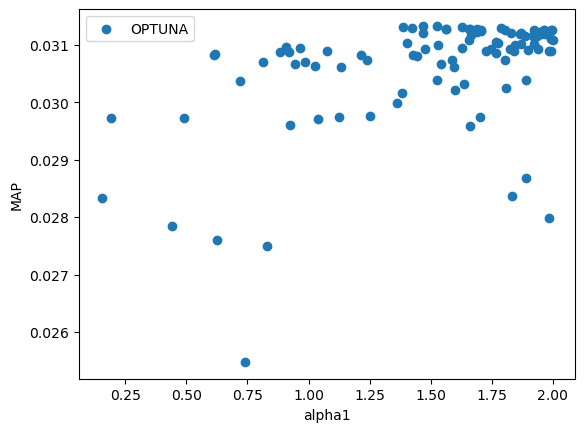

In [41]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.scatter(opt_df["params_alpha1"].values, opt_df["value"].values, label="OPTUNA")
#pyplot.plot(MAP_per_shrinkage_rnd["shrink"].values, MAP_per_shrinkage_rnd["MAP"].values, label="Rnd")
pyplot.ylabel('MAP')
pyplot.xlabel('alpha1')
pyplot.legend()
pyplot.show()

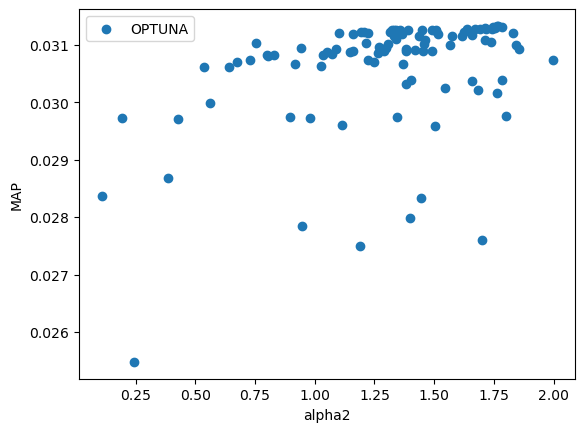

In [42]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.scatter(opt_df["params_alpha2"].values, opt_df["value"].values, label="OPTUNA")
#pyplot.plot(MAP_per_shrinkage_rnd["shrink"].values, MAP_per_shrinkage_rnd["MAP"].values, label="Rnd")
pyplot.ylabel('MAP')
pyplot.xlabel('alpha2')
pyplot.legend()
pyplot.show()

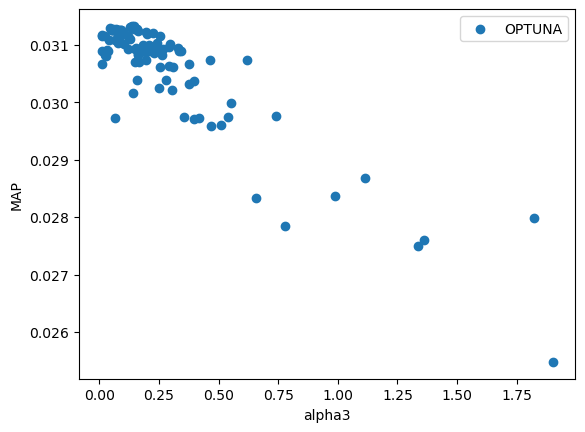

In [43]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.scatter(opt_df["params_alpha3"].values, opt_df["value"].values, label="OPTUNA")
#pyplot.plot(MAP_per_shrinkage_rnd["shrink"].values, MAP_per_shrinkage_rnd["MAP"].values, label="Rnd")
pyplot.ylabel('MAP')
pyplot.xlabel('alpha3')
pyplot.legend()
pyplot.show()

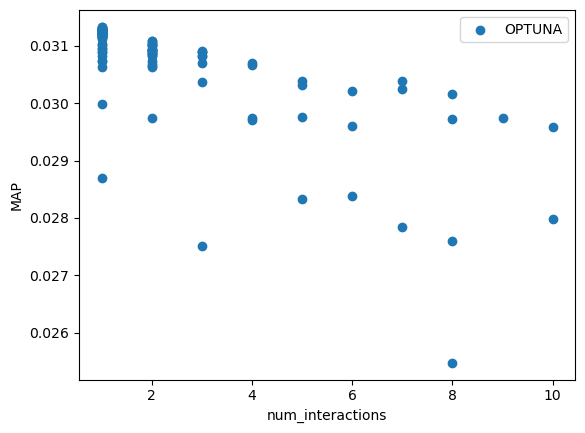

In [45]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.scatter(opt_df["params_min_interactions"].values, opt_df["value"].values, label="OPTUNA")
#pyplot.plot(MAP_per_shrinkage_rnd["shrink"].values, MAP_per_shrinkage_rnd["MAP"].values, label="Rnd")
pyplot.ylabel('MAP')
pyplot.xlabel('num_interactions')
pyplot.legend()
pyplot.show()

In [46]:
final_SLIMEN_recommender = SLIMElasticNetRecommender(urm_all)
final_SLIMEN_recommender.fit(**SLIMEN_best_params)
gc.collect()
final_RP3Beta_recommender = RP3betaRecommender(urm_all)
final_RP3Beta_recommender.fit(**RP3Beta_best_params)
gc.collect()

final_ITEMKNN_recommender = ItemKNNCFRecommender(urm_all)
final_ITEMKNN_recommender.fit(**ItemKNN_best_params)
gc.collect()

final_IALS_recommender = IALSRecommender(urm_all)
final_IALS_recommender.fit(**IALS_best_params)

SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.25 min. Items per second: 87.04
RP3betaRecommender: Similarity column 22222 (100.0%), 7245.55 column/sec. Elapsed time 3.07 sec
Similarity column 22222 (100.0%), 11725.27 column/sec. Elapsed time 1.90 sec
IALSRecommender: Epoch 1 of 110. Elapsed time 17.44 sec
IALSRecommender: Epoch 2 of 110. Elapsed time 37.54 sec
IALSRecommender: Epoch 3 of 110. Elapsed time 56.24 sec
IALSRecommender: Epoch 4 of 110. Elapsed time 1.19 min
IALSRecommender: Epoch 5 of 110. Elapsed time 1.46 min
IALSRecommender: Epoch 6 of 110. Elapsed time 1.71 min
IALSRecommender: Epoch 7 of 110. Elapsed time 1.96 min
IALSRecommender: Epoch 8 of 110. Elapsed time 2.22 min
IALSRecommender: Epoch 9 of 110. Elapsed time 2.48 min
IALSRecommender: Epoch 10 of 110. Elapsed time 2.74 min
IALSRecommender: Epoch 11 of 110. Elapsed time 2.99 min
IALSRecommender: Epoch 12 of 110. Elapsed time 3.25 min
IALSRecommender: Epoch 13 of 110. Elapsed time 3.52 min
IALSRecommender:

In [47]:
final = model(urm_all,final_ITEMKNN_recommender, [final_SLIMEN_recommender,final_RP3Beta_recommender, final_IALS_recommender],True, study.best_params.get("min_interactions"))
final.fit(alphas = [study.best_params.get("alpha1"),study.best_params.get("alpha2"),study.best_params.get("alpha3")])

In [48]:
item_popularity_encoded = np.ediff1d(urm_all.tocsc().indptr)
item_popularity_encoded = np.sort(item_popularity_encoded)

In [50]:
target_users = pd.read_csv("Dataset/data_target_users_test.csv")
target_users.columns = ["UserID"]

In [51]:
tar_users = target_users["UserID"].astype(int)
topPop_encoded = item_popularity_encoded[-10:]

submission = []

print(np.unique(df["UserID"].values))

for index, user in enumerate(tar_users):
    if (user not in df["UserID"].values):
        item_list_encoded = topPop_encoded
    else:
        item_list_encoded = final.recommend(user2user_encoded[user])[:10]
    item_list = []
    for item_encoded in item_list_encoded:
        item_list.append(item_encoded2item[item_encoded])
    submission.append((user, item_list))

[    1     2     3 ... 13022 13023 13024]


In [52]:
def write_submission(submissions):
    with open("./submission_ULTRAHYBRID.csv", "w") as f:
        f.write("user_id,item_list\n")
        for user_id, items in submissions:
            f.write(f"{user_id},{' '.join([str(item) for item in items])}\n")
            
write_submission(submission)